In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import graphviz
from IPython.display import display


In [8]:
data_path = "/content/bank-additional.csv"
df = pd.read_csv(data_path, sep=';')  # Using semicolon as separator
display(df.head())  # Display first few rows


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [9]:
print(df.info())  # Data structure overview
print("\nMissing Values:\n", df.isnull().sum())  # Check for missing values
print("\nUnique Values per Column:\n", df.nunique())  # Unique values per feature


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [12]:
df = df.ffill()  # Forward fill missing values


In [13]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category').cat.codes


In [14]:
features = df.columns.drop('y')  # Exclude target column
target = 'y'

X = df[features]
y = df[target]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


In [16]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=10)
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=10)

In [17]:
y_pred = model.predict(X_test)


In [18]:
acc = accuracy_score(y_test, y_pred)
print(f"📊 Accuracy Score: {acc * 100:.2f}%")

report = classification_report(y_test, y_pred, target_names=['No Purchase', 'Purchase'])
print("\n📝 Classification Report:\n", report)


📊 Accuracy Score: 90.86%

📝 Classification Report:
               precision    recall  f1-score   support

 No Purchase       0.94      0.96      0.95      1099
    Purchase       0.60      0.52      0.56       137

    accuracy                           0.91      1236
   macro avg       0.77      0.74      0.75      1236
weighted avg       0.90      0.91      0.91      1236



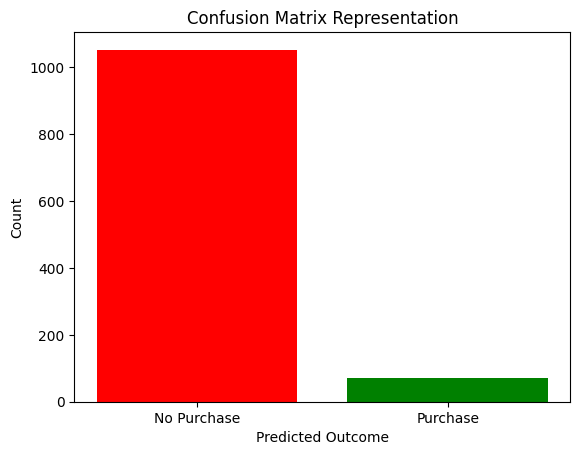

In [19]:
cm = confusion_matrix(y_test, y_pred)
categories = ['No Purchase', 'Purchase']

plt.bar(categories, cm.diagonal(), color=['red', 'green'])
plt.xlabel("Predicted Outcome")
plt.ylabel("Count")
plt.title("Confusion Matrix Representation")
plt.show()


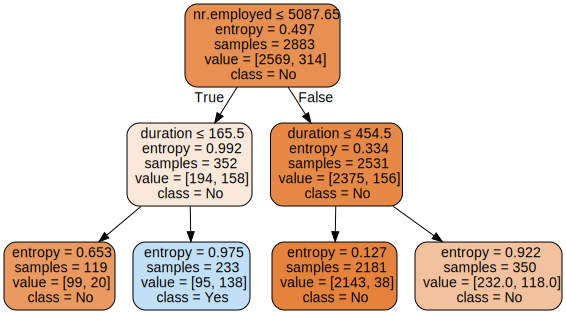

In [23]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2,
                             min_samples_split=100, min_samples_leaf=50, random_state=10)
clf.fit(X_train, y_train)

dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns,
                           class_names=['No', 'Yes'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
display(graph)
